In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas
from nltk import sent_tokenize
from sklearn.model_selection import train_test_split

In [25]:
def roc_curve_plot(classifier, X_test, y_test):
        probs = classifier.predict_proba(X_test)
        preds = probs[:,0]
        y_new_test = label_binarize(y_test, classes=['spam', 'ham'])
        fpr, tpr, threshold = metrics.roc_curve(y_new_test, preds, pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)
        print('AUC for' , classifier.__class__.__name__ , 'is', roc_auc  )
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [21]:
def perform(classifiers, vectorizers, X_train_data, X_test_data, y_train_data, y_test_data):
    for classifier in classifiers:
        for vectorizer in vectorizers:
            string = ''
            string += classifier.__class__.__name__ + ' with ' + vectorizer.__class__.__name__
            vectorize_text = vectorizer.fit_transform(X_train_data)
            classifier.fit(vectorize_text, y_train_data)

            # score
            vectorize_text = vectorizer.transform(X_test_data)
            score = classifier.score(vectorize_text, y_test_data)
            string += '. Has score: ' + str(score)
            print(string)
            roc_curve_plot(classifier, vectorize_text, y_test_data)


In [22]:
data = pandas.read_csv('INBOX.csv', encoding='utf-8')

data_n = data.iloc[: , 0:2]
tt = data_n['v2'].apply(sent_tokenize)
new_tt = tt.apply(lambda x : ''.join(x))
data_n['tt'] = new_tt
newdf = data_n.sample(frac=1)

C:\Users\Manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X_train, X_test, y_train, y_test = train_test_split(newdf.tt, newdf.v1, test_size=0.33, random_state=42)

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression with TfidfVectorizer. Has score: 0.8469696969696969
AUC for LogisticRegression is 0.9256878443526171


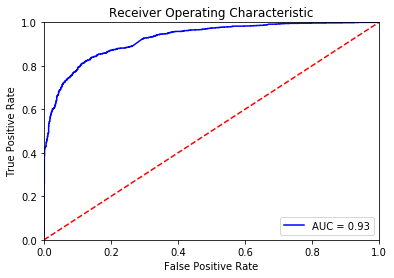

MultinomialNB with TfidfVectorizer. Has score: 0.8170454545454545
AUC for MultinomialNB is 0.9261096763085399


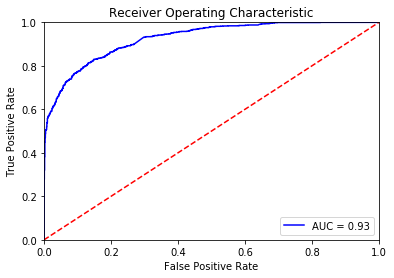

KNeighborsClassifier with TfidfVectorizer. Has score: 0.6333333333333333
AUC for KNeighborsClassifier is 0.723126147842057


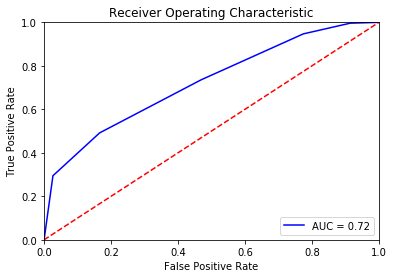

In [26]:
perform(
    [
        LogisticRegression(),
        MultinomialNB(),
        KNeighborsClassifier()
    ],
    [
        TfidfVectorizer()
    ],
    X_train,
    X_test,
    y_train,
    y_test
)